<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0321ENSkillsNetwork928-2023-01-01">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Data Visualization Lab**


Estimated time needed: **45 to 60** minutes


In this assignment you will be focusing on the visualization of data.

The data set will be presented to you in the form of a RDBMS.

You will have to use SQL queries to extract the data.


## Objectives


In this lab you will perform the following:


-   Visualize the distribution of data.

-   Visualize the relationship between two features.

-   Visualize composition of data.

-   Visualize comparison of data.


<hr>


## Demo: How to work with database


Download database file.


In [82]:
!wget https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m4_survey_data.sqlite

'wget' is not recognized as an internal or external command,
operable program or batch file.


In [1]:
import requests

url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m4_survey_data.sqlite'
response = requests.get(url)

with open('m4_survey_data.sqlite', 'wb') as file:
    file.write(response.content)

print("Database downloaded and saved as 'm4_survey_data.sqlite'")

Database downloaded and saved as 'm4_survey_data.sqlite'


Connect to the database.


In [2]:
import sqlite3
conn = sqlite3.connect("m4_survey_data.sqlite") # open a database connection

Import pandas module.


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

## Demo: How to run an sql query


In [4]:
# print how many rows are there in the table named 'master'
QUERY = """
SELECT COUNT(*)
FROM master
"""

# the read_sql_query runs the sql query and returns the data as a dataframe
df = pd.read_sql_query(QUERY,conn)
df.head()

,COUNT(*)
0,11398


## Demo: How to list all tables


In [5]:
# print all the tables names in the database
QUERY = """
SELECT name as Table_Name FROM
sqlite_master WHERE
type = 'table'
"""
# the read_sql_query runs the sql query and returns the data as a dataframe
pd.read_sql_query(QUERY,conn)


,Table_Name
0,EduOther
1,DevType
2,LastInt
3,JobFactors
4,WorkPlan
5,WorkChallenge
6,LanguageWorkedWith
7,LanguageDesireNextYear
8,DatabaseWorkedWith
9,DatabaseDesireNextYear


Majority of the survey responders are

In [13]:
QUERY = """
SELECT DevType, COUNT(*) as Total
FROM DevType
GROUP BY DevType
ORDER BY Total
"""
pd.read_sql_query(QUERY,conn)

,DevType,Total
0,Marketing or sales professional,61
1,Senior executive/VP,160
2,Scientist,354
3,Engineering manager,386
4,"Engineer, site reliability",449
5,"Developer, game or graphics",472
6,Product manager,480
7,Educator,514
8,Academic researcher,556
9,Student,766


How many of respondents claimed they work only with 'MySQL'

In [7]:
QUERY = """
SELECT COUNT(*) AS MySQL_Only_Count
FROM DatabaseWorkedWith
WHERE DatabaseWorkedWith = 'MySQL'
AND Respondent NOT IN (
    SELECT Respondent
    FROM DatabaseWorkedWith
    WHERE DatabaseWorkedWith <> 'MySQL'
);

"""
pd.read_sql_query(QUERY,conn)

,MySQL_Only_Count
0,474


## Demo: How to run a group by query


In [88]:
QUERY = """
SELECT Age,COUNT(*) as count
FROM master
group by age
order by age
"""
pd.read_sql_query(QUERY,conn)

,Age,count
0,NaN,287
1,16.0,3
2,17.0,6
3,18.0,29
4,19.0,78
5,20.0,109
6,21.0,203
7,22.0,406
8,23.0,581
9,24.0,679


## Demo: How to describe a table


In [109]:
table_name = 'master'  # the table you wish to describe

QUERY = """
SELECT sql FROM sqlite_master
WHERE name= '{}'
""".format(table_name)

df = pd.read_sql_query(QUERY,conn)
print(df.iat[0,0])

CREATE TABLE "master" (
"index" INTEGER,
  "Respondent" INTEGER,
  "MainBranch" TEXT,
  "Hobbyist" TEXT,
  "OpenSourcer" TEXT,
  "OpenSource" TEXT,
  "Employment" TEXT,
  "Country" TEXT,
  "Student" TEXT,
  "EdLevel" TEXT,
  "UndergradMajor" TEXT,
  "OrgSize" TEXT,
  "YearsCode" TEXT,
  "Age1stCode" TEXT,
  "YearsCodePro" TEXT,
  "CareerSat" TEXT,
  "JobSat" TEXT,
  "MgrIdiot" TEXT,
  "MgrMoney" TEXT,
  "MgrWant" TEXT,
  "JobSeek" TEXT,
  "LastHireDate" TEXT,
  "FizzBuzz" TEXT,
  "ResumeUpdate" TEXT,
  "CurrencySymbol" TEXT,
  "CurrencyDesc" TEXT,
  "CompTotal" REAL,
  "CompFreq" TEXT,
  "ConvertedComp" REAL,
  "WorkWeekHrs" REAL,
  "WorkRemote" TEXT,
  "WorkLoc" TEXT,
  "ImpSyn" TEXT,
  "CodeRev" TEXT,
  "CodeRevHrs" REAL,
  "UnitTests" TEXT,
  "PurchaseHow" TEXT,
  "PurchaseWhat" TEXT,
  "OpSys" TEXT,
  "BlockchainOrg" TEXT,
  "BlockchainIs" TEXT,
  "BetterLife" TEXT,
  "ITperson" TEXT,
  "OffOn" TEXT,
  "SocialMedia" TEXT,
  "Extraversion" TEXT,
  "ScreenName" TEXT,
  "SOVisit1st" T

# Hands-on Lab


## Visualizing distribution of data


### Histograms


Plot a histogram of `ConvertedComp.`


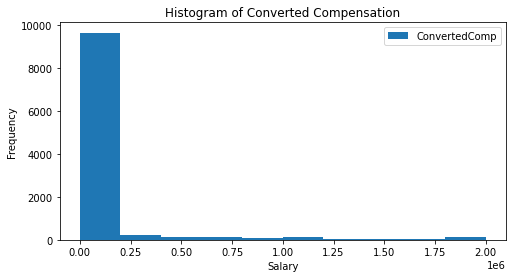

In [90]:
QUERY = """
SELECT ConvertedComp
FROM master
"""
df_convertedcomp = pd.read_sql_query(QUERY,conn)


df_convertedcomp.plot(kind='hist', figsize=(8, 4))
plt.title('Histogram of Converted Compensation')
plt.ylabel('Frequency')
plt.xlabel('Salary')

plt.show()

### Box Plots


Plot a box plot of `Age.`


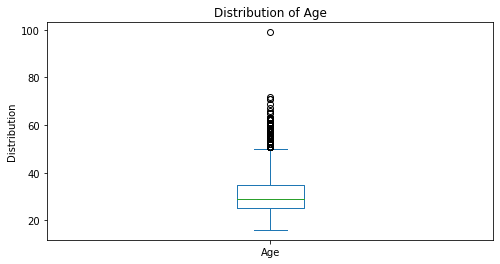

In [91]:

QUERY = """
SELECT Age
FROM master
"""
df_age = pd.read_sql_query(QUERY,conn)


df_age.plot(kind='box', figsize=(8, 4))
plt.title('Distribution of Age')
plt.ylabel('Distribution')

plt.show()

## Visualizing relationships in data


### Scatter Plots


Create a scatter plot of `Age` and `WorkWeekHrs.`


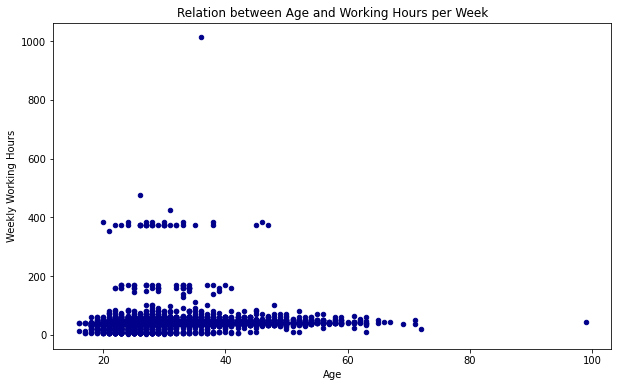

In [92]:

QUERY = """
SELECT Age, WorkWeekHrs as Weekly_Work_Hours
FROM master
"""
df_scatter = pd.read_sql_query(QUERY,conn)


df_scatter.plot(kind='scatter', x='Age', y='Weekly_Work_Hours', figsize=(10, 6), color='darkblue')

plt.title('Relation between Age and Working Hours per Week')
plt.xlabel('Age')
plt.ylabel('Weekly Working Hours')

plt.show()

### Bubble Plots


Create a bubble plot of `WorkWeekHrs` and `CodeRevHrs`, use `Age` column as bubble size.


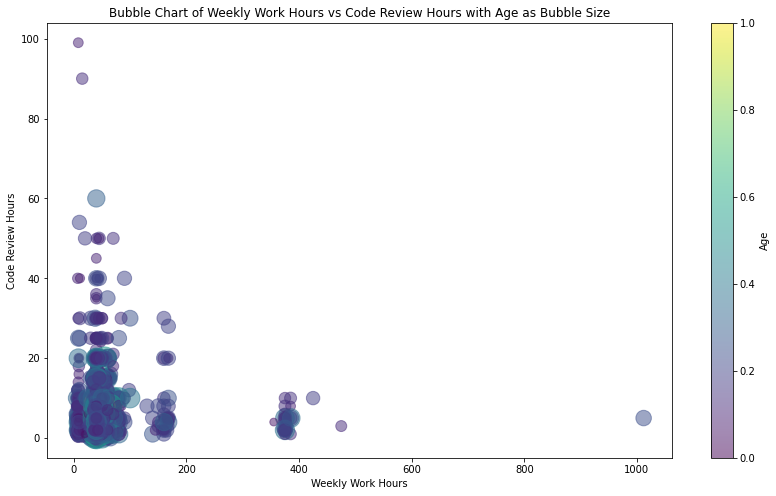

In [93]:
QUERY = """
SELECT Age, WorkWeekHrs as Weekly_Work_Hours, CodeRevHrs
FROM master
"""
df_bubble = pd.read_sql_query(QUERY,conn)
df_bubble


# Normalize the 'Age' column for bubble size
norm_age = (df_bubble['Age'] - df_bubble['Age'].min()) / (df_bubble['Age'].max() - df_bubble['Age'].min())


# Create a bubble chart
plt.figure(figsize=(14, 8))
scatter = plt.scatter(
    df_bubble['Weekly_Work_Hours'],
    df_bubble['CodeRevHrs'],
    s=norm_age * 1000,  # Adjust the bubble size
    alpha=0.5,
    c=norm_age,
    cmap='viridis'
)

plt.colorbar(scatter, label='Age')
plt.xlabel('Weekly Work Hours')
plt.ylabel('Code Review Hours')
plt.title('Bubble Chart of Weekly Work Hours vs Code Review Hours with Age as Bubble Size')
plt.show()

## Visualizing composition of data


### Pie Charts


Create a pie chart of the top 5 databases that respondents wish to learn next year. Label the pie chart with database names. Display percentages of each database on the pie chart.


In [96]:
QUERY = """
SELECT *
FROM DatabaseDesireNextYear
"""
df_pie = pd.read_sql_query(QUERY, conn)
df_pie = df_pie.groupby('DatabaseDesireNextYear').size()
df_pie_sorted = df_pie.sort_values(ascending=False)
df_new = df_pie_sorted.head(5)
df_new

DatabaseDesireNextYear
PostgreSQL       4328
MongoDB          3649
Redis            3331
MySQL            3281
Elasticsearch    2856
dtype: int64

In [100]:
df_pie_sorted

DatabaseDesireNextYear
PostgreSQL              4328
MongoDB                 3649
Redis                   3331
MySQL                   3281
Elasticsearch           2856
Microsoft SQL Server    2706
SQLite                  2437
Firebase                1650
MariaDB                 1385
DynamoDB                1044
Cassandra               1003
Oracle                   870
Other(s):                645
Couchbase                390
dtype: int64

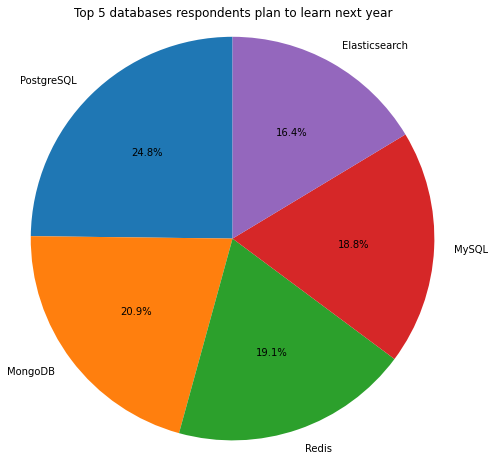

In [99]:
# Data from your DataFrame

labels = df_new.index

# Plotting the pie chart
plt.figure(figsize=(8, 8))
plt.pie(df_new, labels=labels, autopct='%1.1f%%', startangle=90)

# Adding a title
plt.title('Top 5 databases respondents plan to learn next year')

# Display the plot
plt.axis('equal')  # Sets the pie chart to look like a circle
plt.show()


### Stacked Charts


Create a stacked chart of median `WorkWeekHrs` and `CodeRevHrs` for the age group 30 to 35.


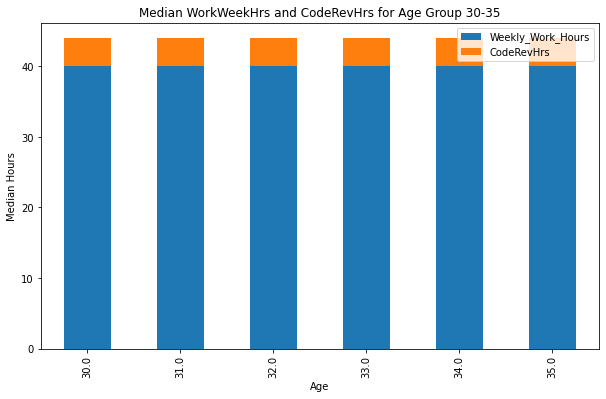

In [65]:
QUERY = """
SELECT Age, WorkWeekHrs as Weekly_Work_Hours, CodeRevHrs
FROM master
"""
df_stacked = pd.read_sql_query(QUERY,conn)

# Step 1: Filter the DataFrame for respondents aged 30 to 35
df_filtered = df_stacked[(df_stacked['Age'] >= 30) & (df_stacked['Age'] <= 35)]

# Step 2: Calculate median WorkWeekHrs and CodeRevHrs for the filtered DataFrame
median_values = df_filtered.groupby('Age')[['Weekly_Work_Hours', 'CodeRevHrs']].median()

# Step 3: Create a stacked bar chart
median_values.plot(kind='bar', stacked=True, figsize=(10, 6))

# Add labels and title
plt.xlabel('Age')
plt.ylabel('Median Hours')
plt.title('Median WorkWeekHrs and CodeRevHrs for Age Group 30-35')

# Show plot
plt.show()

## Visualizing comparison of data


### Line Chart


Plot the median `ConvertedComp` for all ages from 45 to 60.


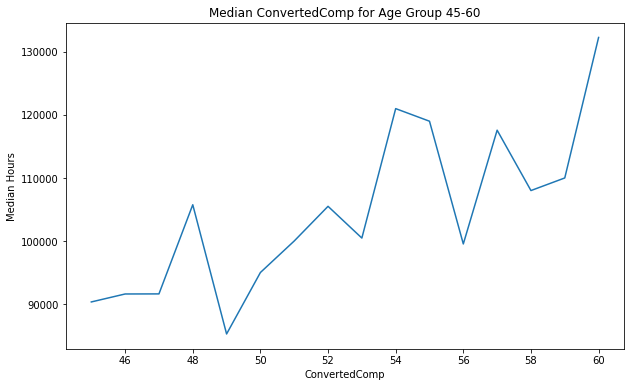

In [66]:
QUERY = """
SELECT Age, ConvertedComp
FROM master
"""
df_line = pd.read_sql_query(QUERY,conn)

# Step 1: Filter the DataFrame 
df_filtered = df_line[(df_line['Age'] >= 45) & (df_line['Age'] <= 60)]

# Step 2: Calculate median 
median_values = df_filtered.groupby('Age')['ConvertedComp'].median()

median_values.plot(kind='line', figsize=(10, 6))

# Add labels and title
plt.xlabel('ConvertedComp')
plt.ylabel('Median Hours')
plt.title('Median ConvertedComp for Age Group 45-60')

# Show plot
plt.show()


Based on the Line Chart of Age and median ConvertedComp for the age group 25-30, what kind of correlation do you see between Age and median ConvertedComp? 

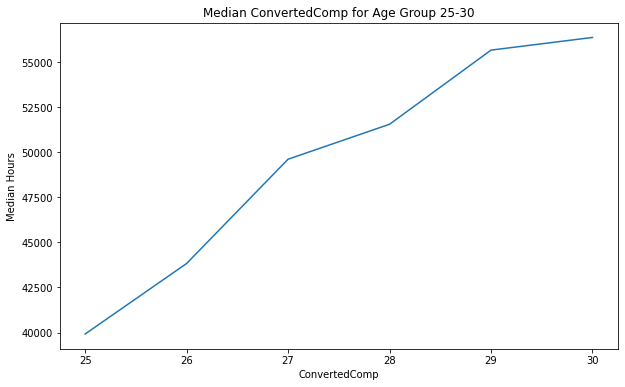

In [9]:
QUERY = """
SELECT Age, ConvertedComp
FROM master
"""
df_line = pd.read_sql_query(QUERY,conn)

# Step 1: Filter the DataFrame 
df_filtered = df_line[(df_line['Age'] >= 25) & (df_line['Age'] <= 30)]

# Step 2: Calculate median 
median_values = df_filtered.groupby('Age')['ConvertedComp'].median()

median_values.plot(kind='line', figsize=(10, 6))

# Add labels and title
plt.xlabel('ConvertedComp')
plt.ylabel('Median Hours')
plt.title('Median ConvertedComp for Age Group 25-30')

# Show plot
plt.show()

### Bar Chart


Create a horizontal bar chart using column `MainBranch.`


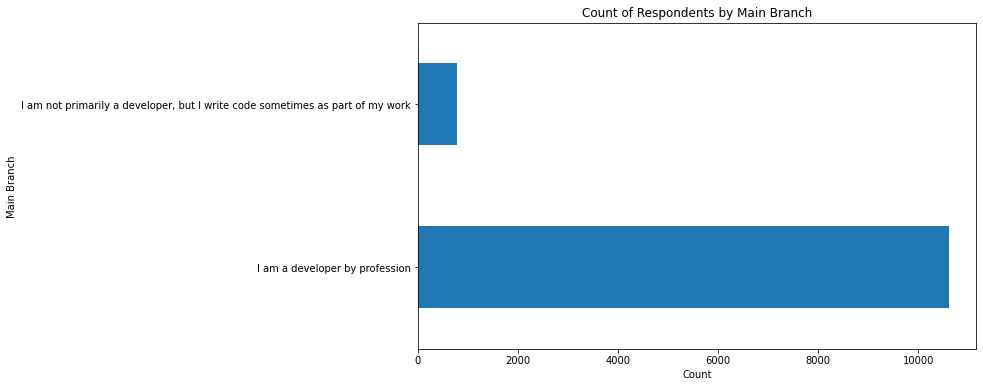

In [78]:
QUERY = """
SELECT Respondent, MainBranch
FROM master
"""
df_bar = pd.read_sql_query(QUERY,conn)

df_mainbranch = df_bar.groupby('MainBranch').size()

df_mainbranch.plot(kind='barh',figsize=(10, 6))

# Add labels and title
plt.xlabel('Count')
plt.ylabel('Main Branch')
plt.title('Count of Respondents by Main Branch')

# Show plot
plt.show()


Close the database connection.


In [79]:
conn.close()

## Authors


Ramesh Sannareddy


### Other Contributors


Rav Ahuja


## Change Log


| Date (YYYY-MM-DD) | Version | Changed By        | Change Description                 |
| ----------------- | ------- | ----------------- | ---------------------------------- |
| 2020-10-17        | 0.1     | Ramesh Sannareddy | Created initial version of the lab |


 Copyright © 2020 IBM Corporation. This notebook and its source code are released under the terms of the [MIT License](https://cognitiveclass.ai/mit-license?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0321ENSkillsNetwork928-2023-01-01&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ).
